## Visualization

In [1]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
    library(magrittr); library(zeallot); library(glue); library(tidyverse); library(glue); library(lubridate)
    library(scales);library(reshape2); library(wmf);library(RColorBrewer); 
})

In [2]:
file <- "metrics/metrics.tsv"
pageview <- read.csv(file, sep = '\t')
pageview$month <- as.Date(pageview$month, format = "%Y-%m-%d")

In [3]:
head(pageview)

,month,desktop,gn_interactions,gn_pageviews,gn_previews,gs_interactions,gs_pageviews,gs_previews,interactions,mh_interactions,mh_pageviews,mh_previews,mobileweb,previews_seen,total_pageview,unique_devices
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016-07-01,7319709535,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,6951477838,NA,14479097793,NA
2,2016-08-01,7808198322,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,7158465508,NA,15164063733,NA
3,2016-09-01,8015803318,NA,NA,NA,NA,3509314705,NA,NA,NA,482166702,NA,7037821889,NA,15227361307,NA
4,2016-10-01,8597813074,NA,NA,NA,NA,3649168724,NA,NA,NA,584002147,NA,7454268064,NA,16205992870,NA
5,2016-11-01,8756368629,NA,NA,NA,NA,3682761207,NA,NA,NA,639332261,NA,7568847051,NA,16499874726,NA
6,2016-12-01,8140608026,NA,NA,NA,NA,3397813382,NA,NA,NA,566587960,NA,7623805561,NA,15964600507,NA


### Pageviews Interactions 

In [4]:
pageview_fy <- pageview %>% 
     select(month,total_pageview,previews_seen) %>%
     mutate(previews_seen = replace_na(previews_seen, 0)) %>%
     mutate(interactions = total_pageview+previews_seen) %>%
     filter(month >= '2017-07-01') %>%
    # filter(month < '2019-07-01') %>%
     mutate(fiscal_year = ifelse(month >= '2017-07-01' & month < '2018-07-01', 'FY 2017/18', ifelse(month <'2017-07-01','FY 2016/17',ifelse(month <'2019-07-01','FY 2018/19','FY 2019/20'))),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))

pageview_fy$MonthN = factor(pageview_fy$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))

In [5]:
head(pageview_fy)

,month,total_pageview,previews_seen,interactions,fiscal_year,MonthN,Month
,<date>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>
1,2017-07-01,14481092187,0,14481092187,FY 2017/18,07,Jul
2,2017-08-01,14592094078,0,14592094078,FY 2017/18,08,Aug
3,2017-09-01,14647090400,0,14647090400,FY 2017/18,09,Sep
4,2017-10-01,15701179307,0,15701179307,FY 2017/18,10,Oct
5,2017-11-01,15499338115,0,15499338115,FY 2017/18,11,Nov
6,2017-12-01,14505539686,0,14505539686,FY 2017/18,12,Dec


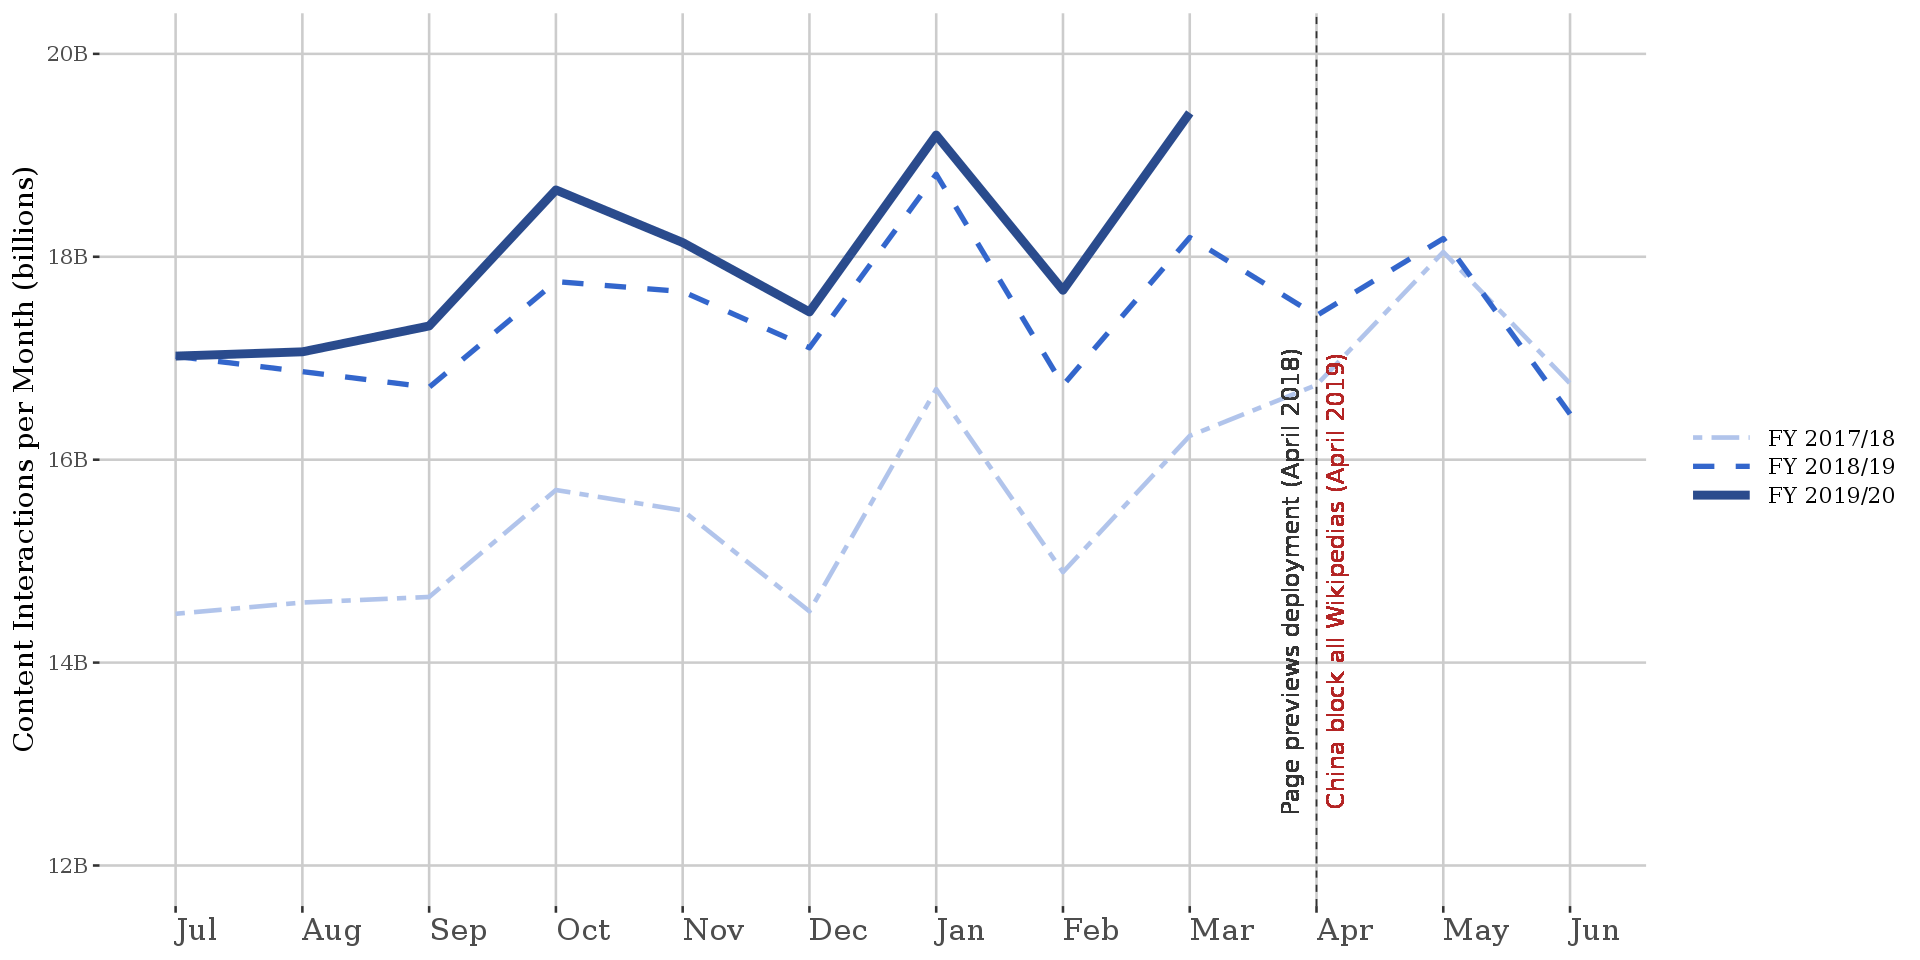

In [6]:
options(repr.plot.width = 16, repr.plot.height = 8)

p<- pageview_fy %>%
    ggplot(aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = interactions, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year)) +
    #geom_point(x=01, y=15377558086 , size = 4, color = '#2a4b8d') +
    #geom_text(aes(x =01, y=15600000000, label="July 2019"),hjust=0, vjust=0, size= 5) +    
    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_size_manual(values = c(1.3,1.5,2.5)) +
    scale_color_manual(values = c("FY 2017/18"= "#b1c4eb", "FY 2018/19" = "#3366cc","FY 2019/20" = "#2a4b8d")) +
    geom_vline(xintercept = 10, linetype = "dashed", color = "gray20") +
    geom_text(aes(x=10, y=14.8E9, label="Page previews deployment (April 2018)"), size=5, vjust = -1, angle = 90, color = "gray20") +
    geom_text(aes(x=10, y=14.8E9, label="China block all Wikipedias (April 2019)"), size=5, vjust = 1.5, angle = 90, color = "#b32424") +
    scale_x_discrete("Month",
                      breaks = pageview_fy$MonthN, 
                     labels = pageview_fy$Month) +
    scale_y_continuous("Content Interactions per Month (billions)",
                       labels = polloi::compress,
                       limits = c(12E9, 20E9)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.title.x=element_blank(),
          axis.text.x =element_text( hjust = 0,size = 18),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=17,hjust = 0.5,vjust = -12),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 13),
          legend.key.width=unit(1.5,"cm"))
  

#ggsave(filename="Pageviews_monthly_yoy2.png", plot = p, path = 'Figures', units = "in", dpi = 192, height = 6, width = 14, limitsize = FALSE)  
p

### Interactions

In [7]:
view <- 
    pageview %>% 
    select(month,previews_seen,total_pageview,) %>%
    rename(pageviews = "total_pageview") %>%
    rename(previews = "previews_seen") %>%
    gather(type,views, pageviews:previews)
    
interaction <- pageview %>% 
    select(month,total_pageview,previews_seen) %>%
    mutate(previews_seen = replace_na(previews_seen, 0)) %>%
    mutate(interactions = total_pageview+previews_seen)



Warning message:
“Removed 21 rows containing missing values (position_stack).”
Warning message:
“Removed 1 rows containing missing values (geom_col).”


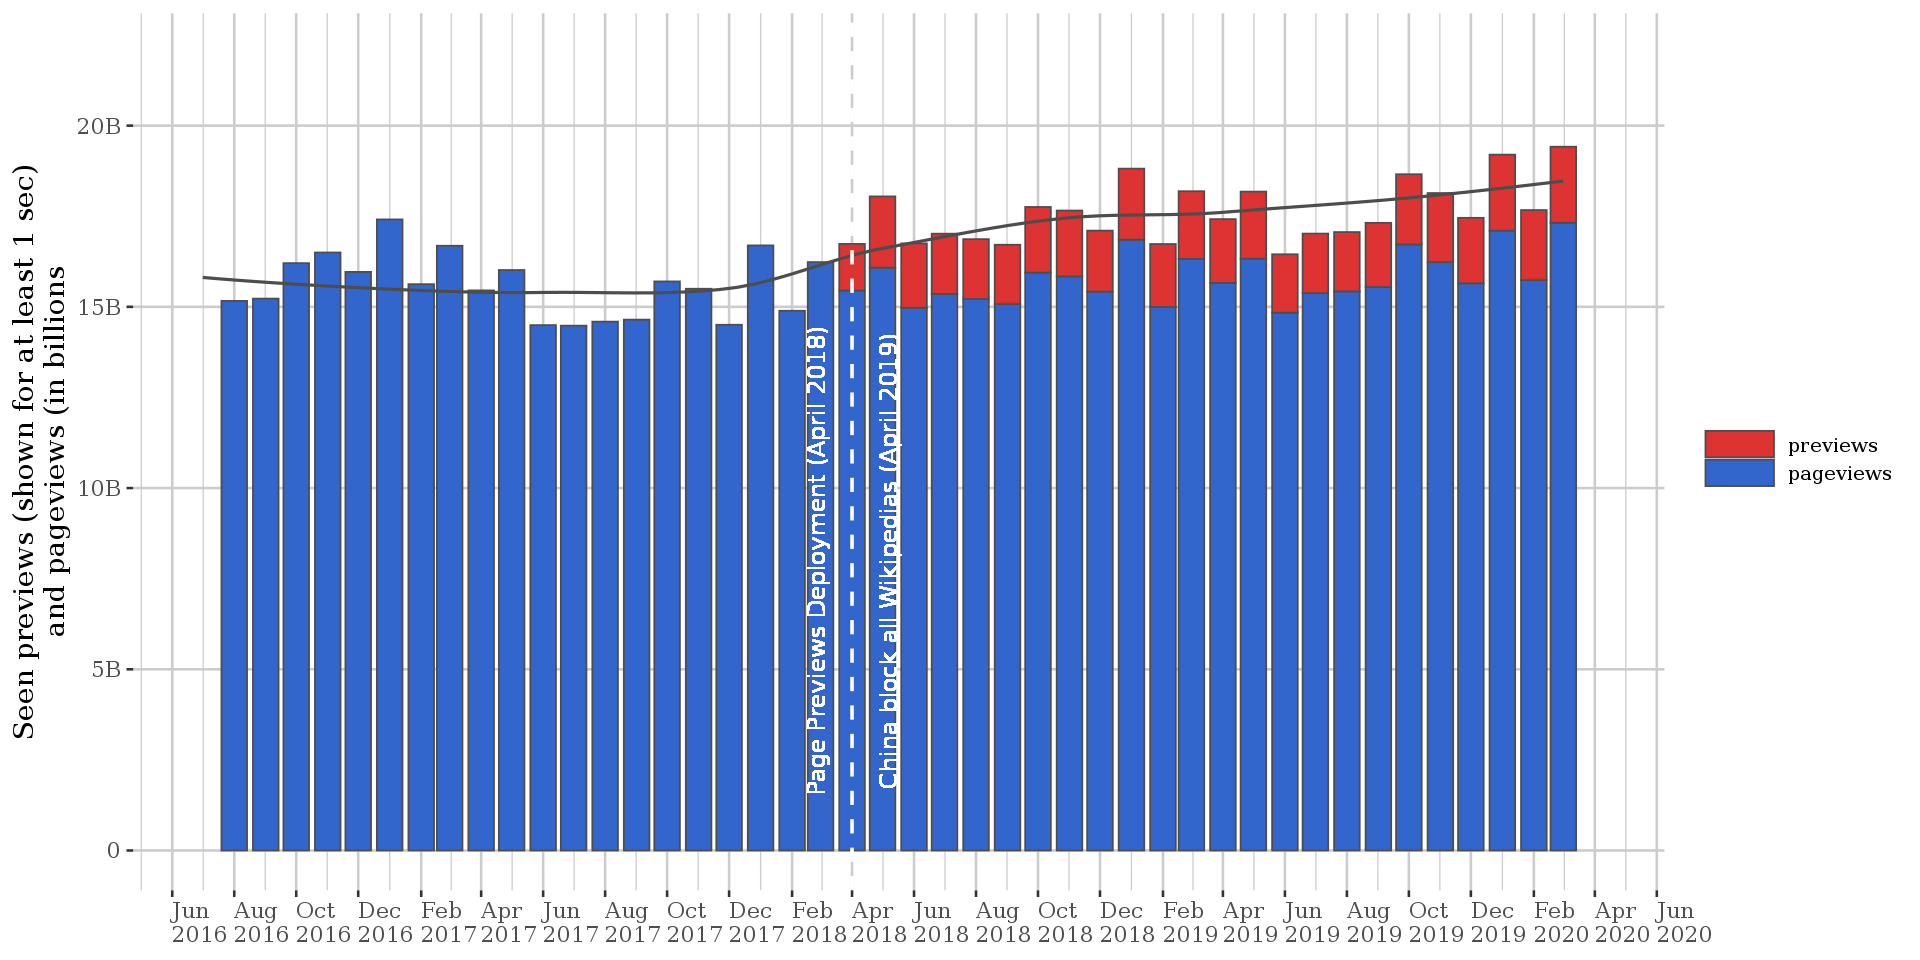

In [9]:
p<- ggplot(data = view, aes(x = month)) + 
    geom_col(data = view, mapping = aes(y = views, fill = factor(type, levels=c("previews","pageviews"))), position= "stack", color ="grey30") +
    geom_smooth(data = interaction,mapping = aes(y=interactions), method = "loess", se = FALSE, size = 0.9,color = 'grey30') +
    scale_fill_manual(values = c("pageviews" = "#3366cc","previews" = "#dd3333")) +
    scale_y_continuous("Seen previews (shown for at least 1 sec)\nand pageviews (in billions",
                       labels = polloi::compress,
                       limits = c(0, 22E9)) +
    scale_x_date("Date", 
                 labels = date_format("%b\n%Y"), 
                 date_breaks = "2 months",
                 limits= as.Date(c("2016-07-01", "2020-04-01"))) +
    geom_vline(xintercept = as.numeric(as.Date("2018-04-01")),
             linetype = "dashed", color = "white",size =1) +
    geom_text(aes(x=as.Date('2018-04-01'), y=8E9, label="Page Previews Deployment (April 2018)"), size=5, vjust = -1.5, angle = 90, color = "white") +
    geom_text(aes(x=as.Date('2018-04-01'), y=8E9, label="China block all Wikipedias (April 2019)"), size=5, vjust = 2.5, angle = 90, color = "white") +
   # labs(title = "Pageviews and seen previews per calendar month") +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif")+
    theme(axis.title.x=element_blank(),
          axis.text=element_text( hjust = 0,size = 13,family="serif"),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=17,hjust = 0.5,vjust = -12),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0,size = 12),
          legend.key.width=unit(1.5,"cm"))

#ggsave(filename="Pageviews and interactions_StackedBar.png", plot = p, path = 'Figures', units = "in", dpi = 192, height = 6, width = 14, limitsize = FALSE)  
p

### Pageviews by Type

In [13]:
pageview_d <- pageview %>% 
     select(month,desktop,previews_seen) %>%
     mutate(previews_seen = replace_na(previews_seen, 0)) %>%
     mutate(interactions = desktop+previews_seen) %>%
     filter(month >= '2017-07-01') %>%
     filter(month < '2020-04-01') %>%
     mutate(fiscal_year = ifelse(month >= '2017-07-01' & month < '2018-07-01', 'FY 2017/18', ifelse(month <'2017-07-01','FY 2016/17',ifelse(month <'2019-07-01','FY 2018/19','FY 2019/20'))),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))

pageview_d$MonthN = factor(pageview_d$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))

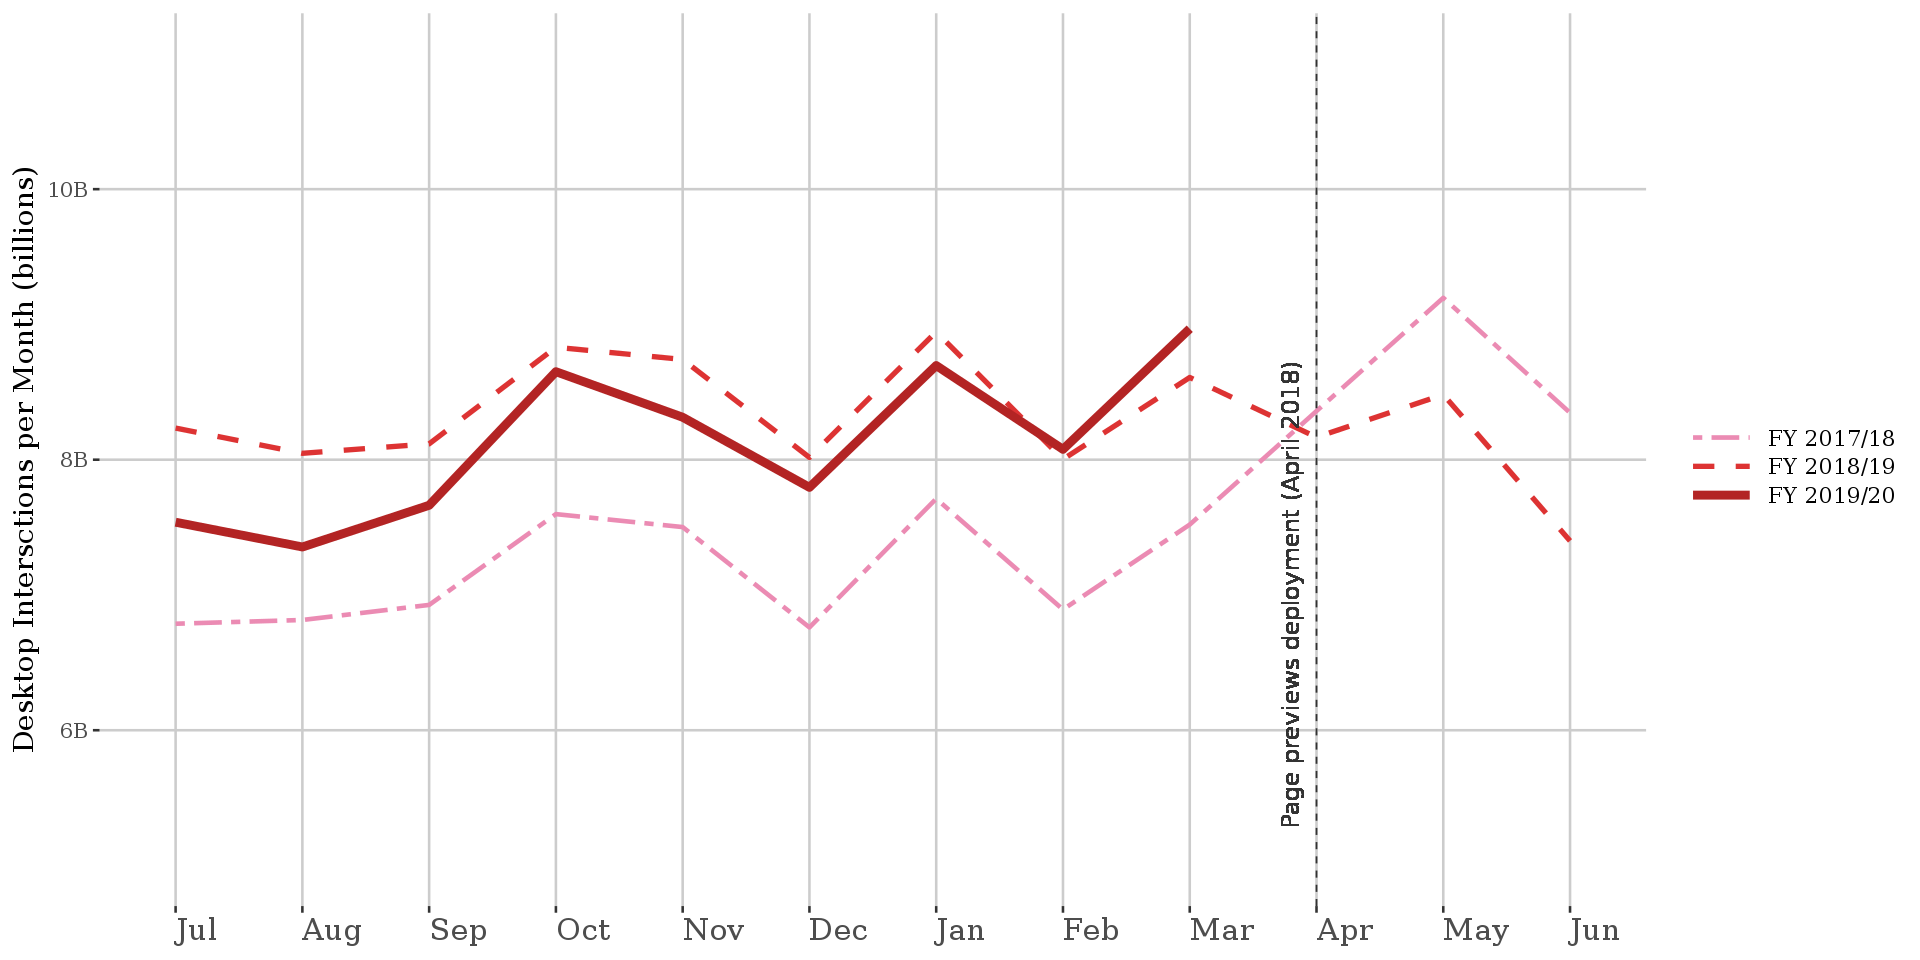

In [14]:
options(repr.plot.width = 16, repr.plot.height = 8)

p<- pageview_d %>%
    ggplot(aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = interactions, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year)) +
    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_size_manual(values = c(1.3,1.5,2.5)) +
    scale_color_manual(values = c("FY 2017/18" = "#eb8bb3", "FY 2018/19" = "#dd3333","FY 2019/20" = "#b32424")) +
    geom_vline(xintercept = 10, linetype = "dashed", color = "gray20") +
    geom_text(aes(x=10, y=7E9, label="Page previews deployment (April 2018)"), size=5, vjust = -1, angle = 90, color = "gray20") +
    scale_x_discrete("Month",
                      breaks = pageview_d$MonthN, 
                     labels = pageview_d$Month) +
    scale_y_continuous("Desktop Intersctions per Month (billions)",
                       labels = polloi::compress,limits = c(5E9, 11E9)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.title.x=element_blank(),
          axis.text.x =element_text( hjust = 0,size = 18),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=17,hjust = 0.5,vjust = -12),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 13),
          legend.key.width=unit(1.5,"cm"))
  

#ggsave(filename="Pageviews_monthly_yoy2.png", plot = p, path = 'Figures', units = "in", dpi = 192, height = 6, width = 14, limitsize = FALSE)  
p

In [16]:
  pageview_m <- pageview %>% 
     select(month,mobileweb) %>%
     filter(month >= '2017-07-01') %>%
     filter(month < '2020-04-01') %>%
     mutate(fiscal_year = ifelse(month >= '2017-07-01' & month < '2018-07-01', 'FY 2017/18', ifelse(month <'2017-07-01','FY 2016/17',ifelse(month <'2019-07-01','FY 2018/19','FY 2019/20'))),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))

pageview_m$MonthN = factor(pageview_m$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))

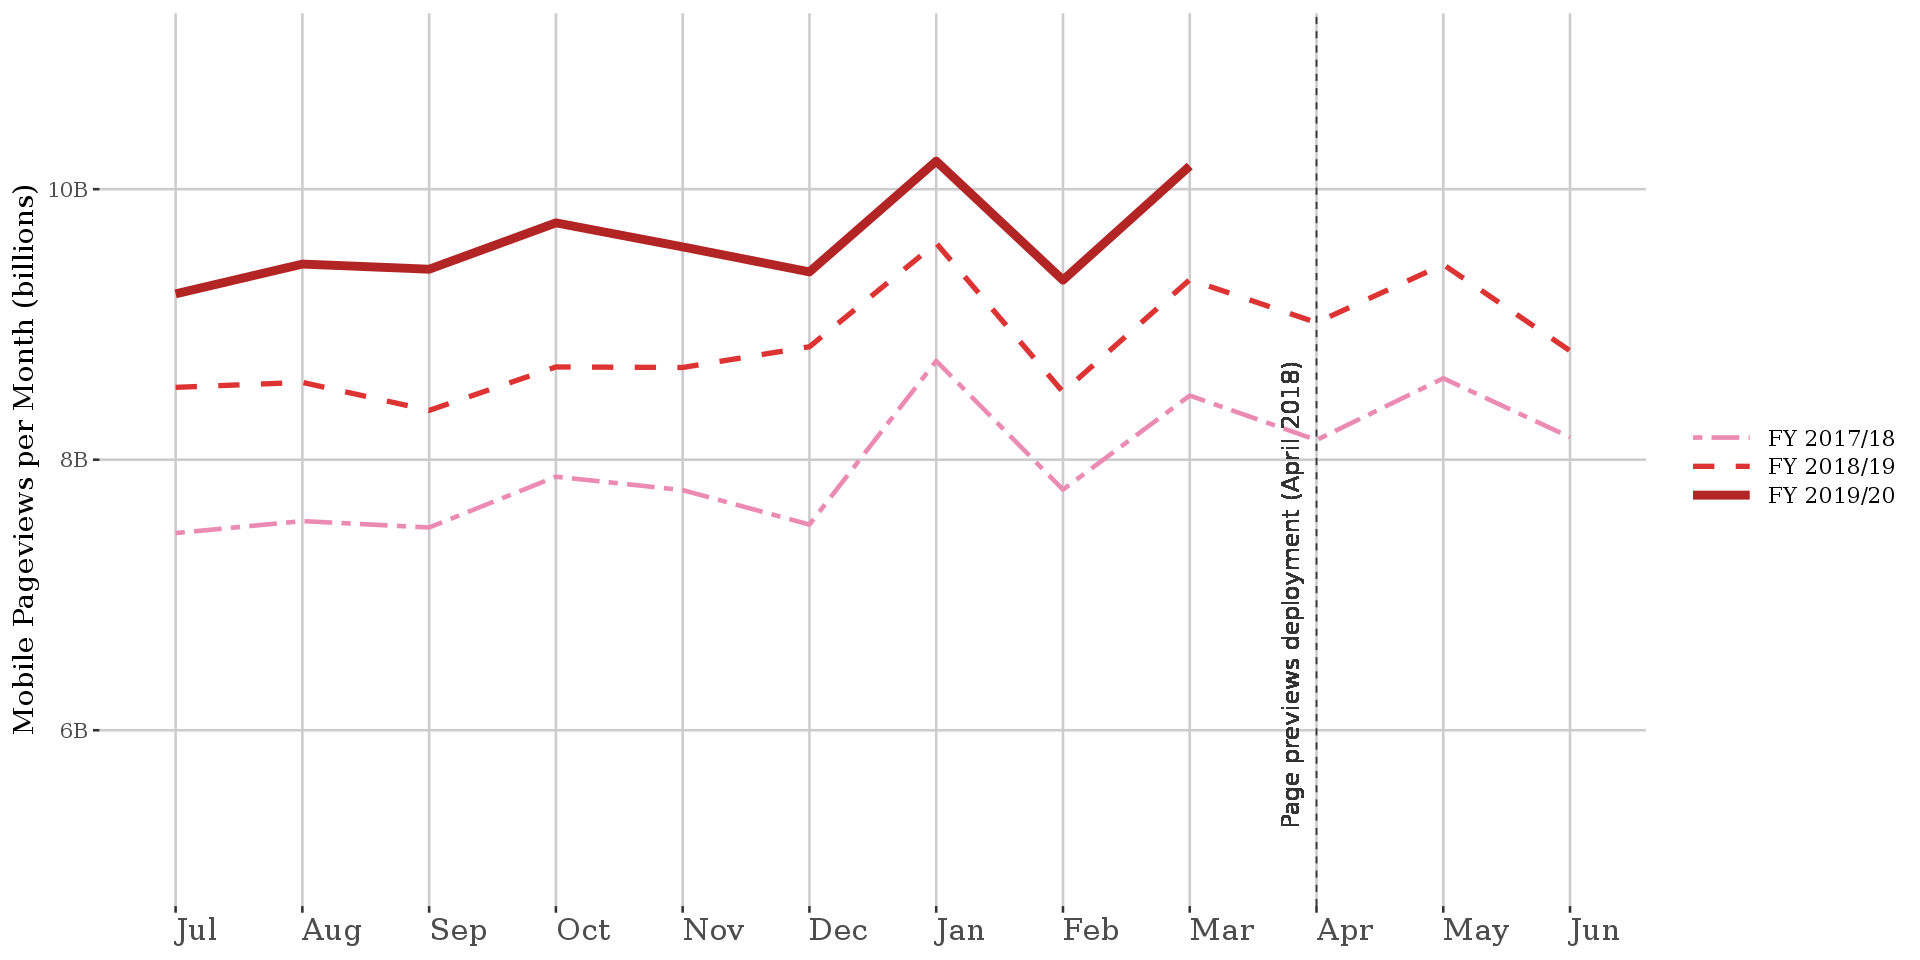

In [17]:
options(repr.plot.width = 16, repr.plot.height = 8)

p<- pageview_m %>%
    ggplot(aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = mobileweb, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year)) +
    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_size_manual(values = c(1.3,1.5,2.5)) +
    scale_color_manual(values = c("FY 2017/18" = "#eb8bb3", "FY 2018/19" = "#dd3333","FY 2019/20" = "#b32424")) +
    geom_vline(xintercept = 10, linetype = "dashed", color = "gray20") +
    geom_text(aes(x=10, y=7E9, label="Page previews deployment (April 2018)"), size=5, vjust = -1, angle = 90, color = "gray20") +
    scale_x_discrete("Month",
                      breaks = pageview_m$MonthN, 
                     labels = pageview_m$Month) +
    scale_y_continuous("Mobile Pageviews per Month (billions)",
                       labels = polloi::compress,limits = c(5E9, 11E9)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.title.x=element_blank(),
          axis.text.x =element_text( hjust = 0,size = 18),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=17,hjust = 0.5,vjust = -12),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 13),
          legend.key.width=unit(1.5,"cm"))
  

#ggsave(filename="Pageviews_monthly_yoy2.png", plot = p, path = 'Figures', units = "in", dpi = 192, height = 6, width = 14, limitsize = FALSE)  
p

### Preview

In [19]:
preview <- pageview %>% 
     select(month,previews_seen) %>%
     mutate(previews_seen = replace_na(previews_seen, 0)) %>%
     filter(month >= '2018-04-01') %>%
     filter(month < '2020-04-01') %>%
     mutate(fiscal_year = ifelse(month >= '2017-07-01' & month < '2018-07-01', 'FY 2017/18', ifelse(month <'2017-07-01','FY 2016/17',ifelse(month <'2019-07-01','FY 2018/19','FY 2019/20'))),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))

preview$MonthN = factor(preview$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))

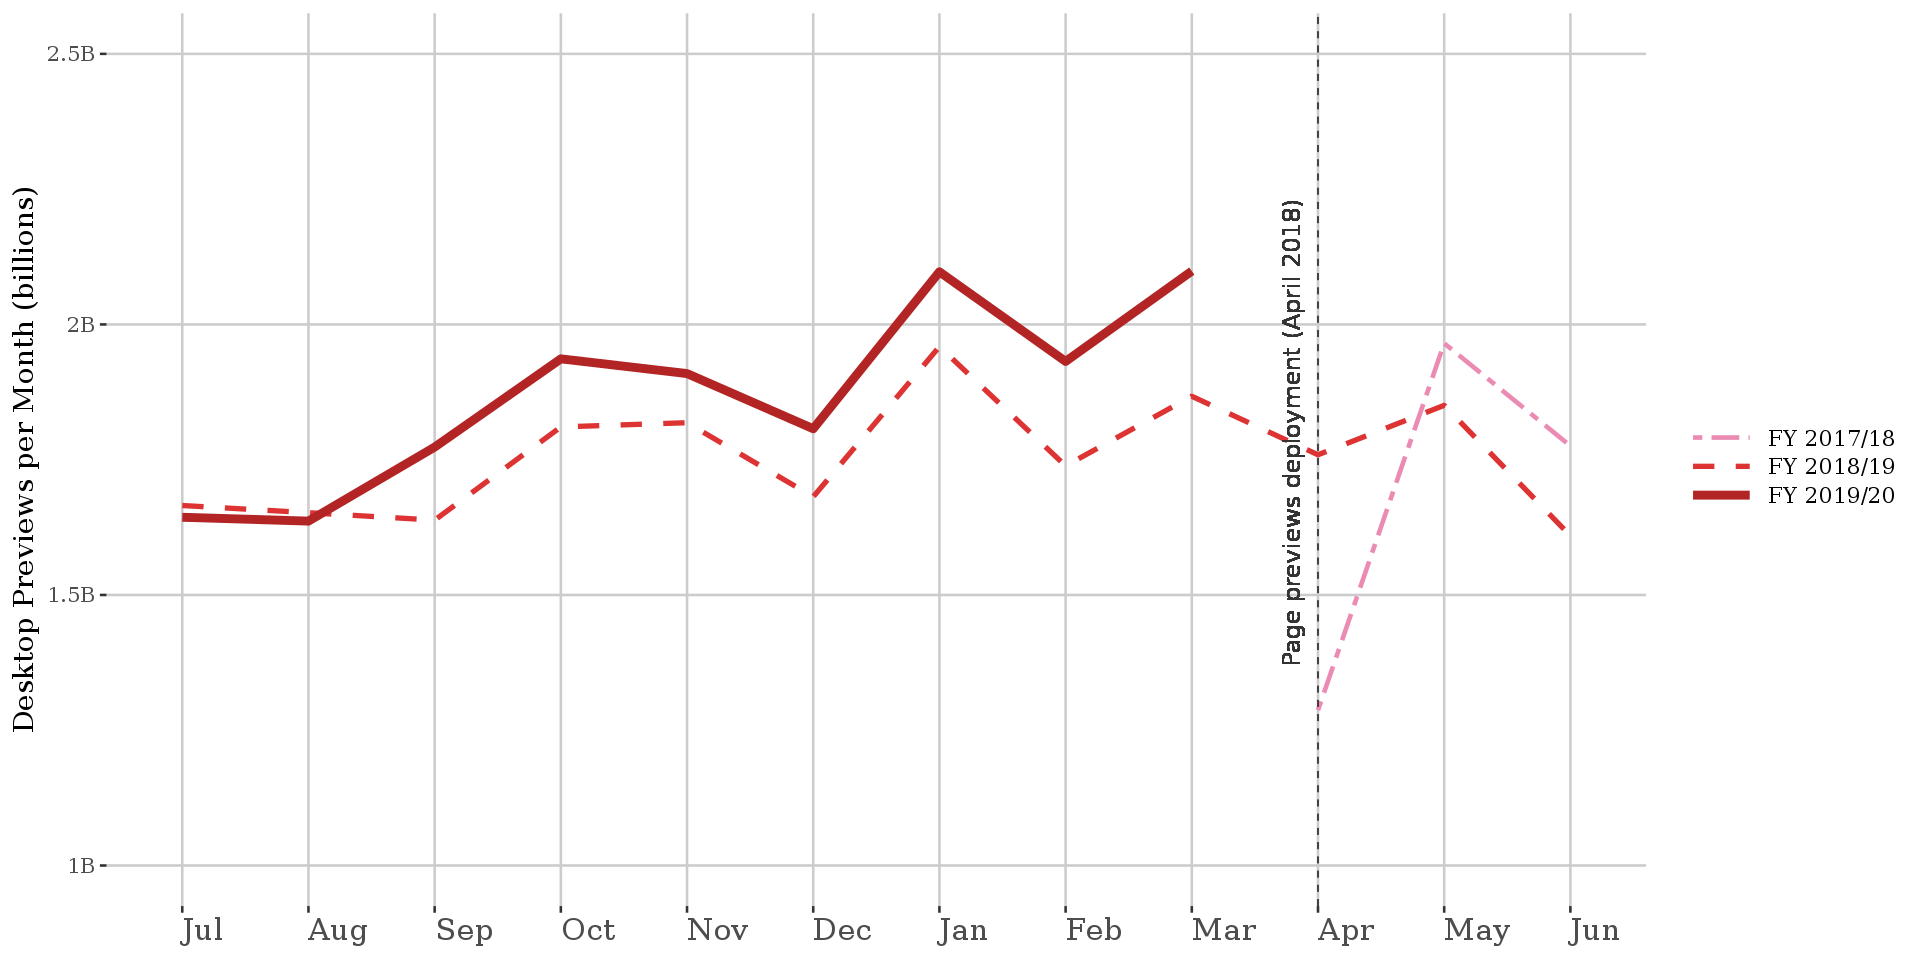

In [20]:
options(repr.plot.width = 16, repr.plot.height = 8)

p<- preview %>%
    ggplot(aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = previews_seen, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year)) +
    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_size_manual(values = c(1.3,1.5,2.5)) +
    scale_color_manual(values = c("FY 2017/18" = "#eb8bb3", "FY 2018/19" = "#dd3333","FY 2019/20" = "#b32424")) +
    geom_vline(xintercept = 10, linetype = "dashed", color = "gray20") +
    geom_text(aes(x=10, y=18E8, label="Page previews deployment (April 2018)"), size=5, vjust = -1, angle = 90, color = "gray20") +
    scale_x_discrete("Month",
                      breaks = preview$MonthN, 
                     labels = preview$Month) +
    scale_y_continuous("Desktop Previews per Month (billions)",
                       labels = polloi::compress,limits = c(10E8, 25E8)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.title.x=element_blank(),
          axis.text.x =element_text( hjust = 0,size = 18),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=17,hjust = 0.5,vjust = -12),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 13),
          legend.key.width=unit(1.5,"cm"))
  

#ggsave(filename="Pageviews_monthly_yoy2.png", plot = p, path = 'Figures', units = "in", dpi = 192, height = 6, width = 14, limitsize = FALSE)  
p

## Interaction - Emerging Markets 

In [21]:
gs_inter_fy <- pageview %>% 
     select(month,gs_interactions) %>%
     filter(month >= '2018-07-01') %>%
     mutate(fiscal_year = ifelse(month <'2019-07-01','FY 2018/19','FY 2019/20'),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))

gs_inter_fy$MonthN = factor(gs_inter_fy$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))

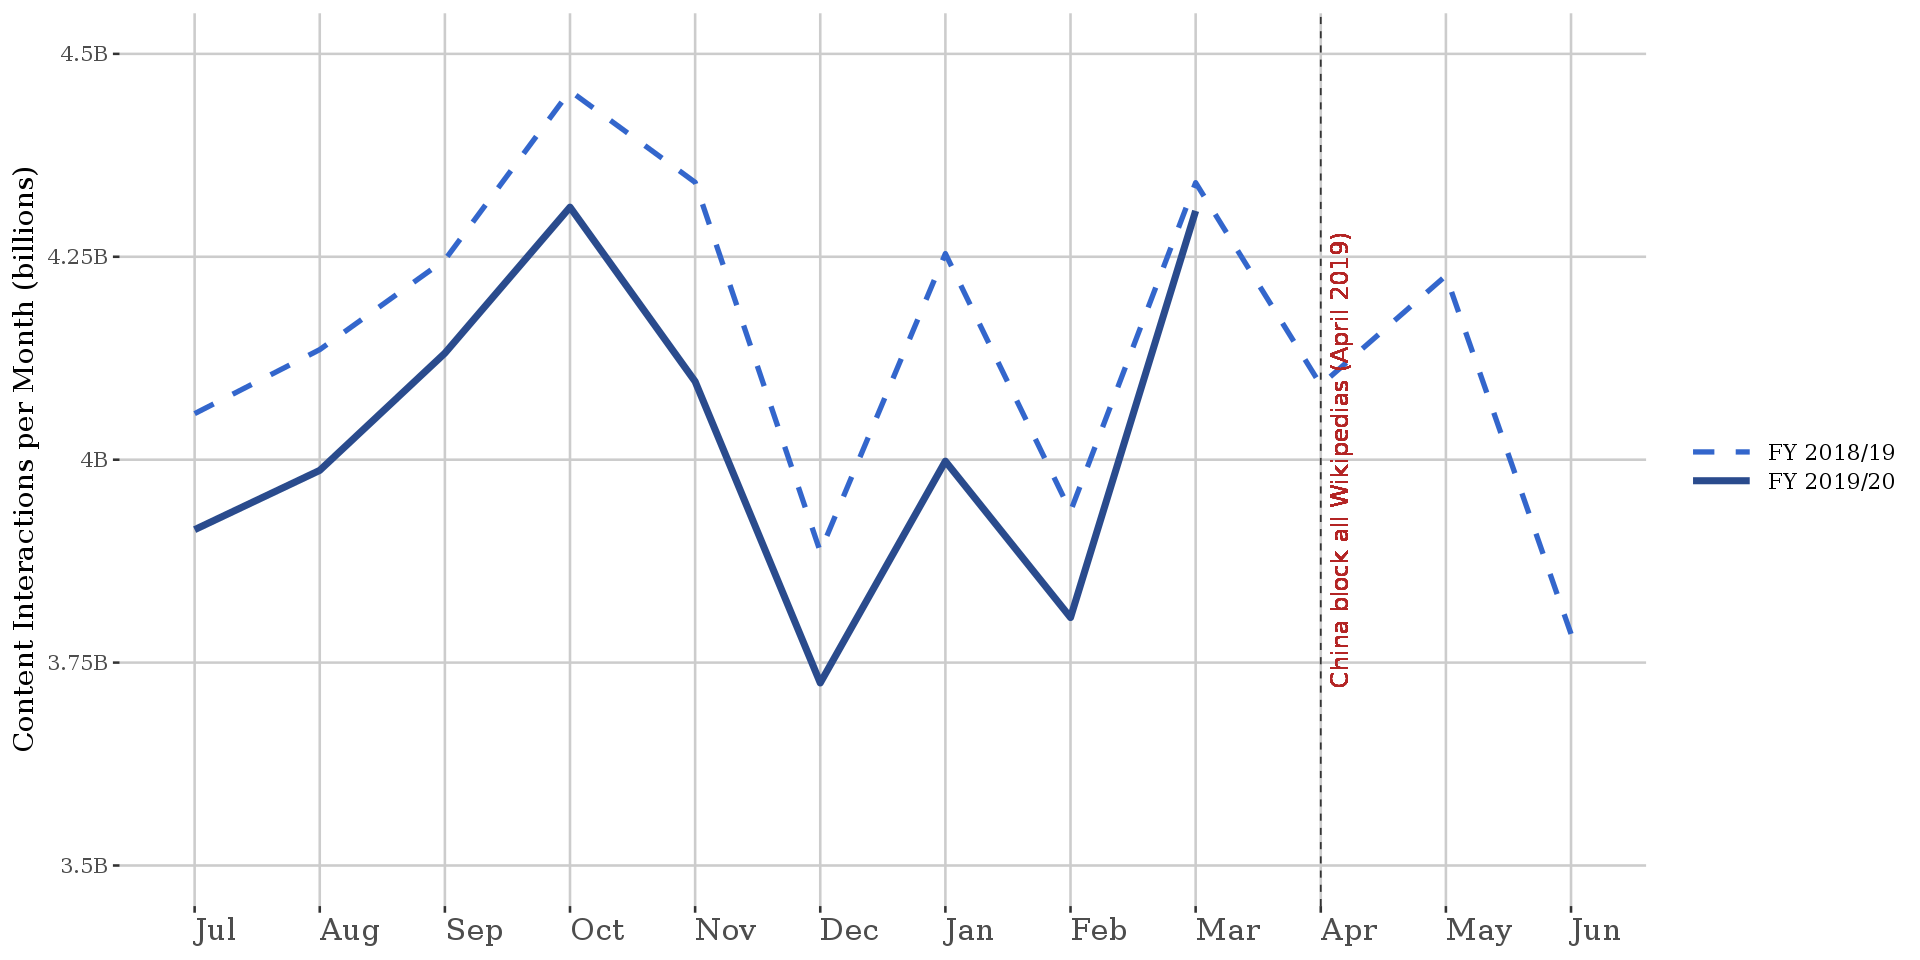

In [22]:
options(repr.plot.width = 16, repr.plot.height = 8)

p<- gs_inter_fy %>%
    ggplot(aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = gs_interactions, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year)) +   
    scale_linetype_manual(values=c("dashed","solid")) +
    scale_size_manual(values = c(1.5,2.0)) +
    scale_color_manual(values = c("FY 2018/19" = "#3366cc","FY 2019/20" = "#2a4b8d")) +
    geom_vline(xintercept = 10, linetype = "dashed", color = "gray20") +
    geom_text(aes(x=10, y=4E9, label="China block all Wikipedias (April 2019)"), size=5, vjust = 1.5, angle = 90, color = "#b32424") +
    scale_x_discrete("Month",
                      breaks = gs_inter_fy$MonthN, 
                     labels = gs_inter_fy$Month) +
    scale_y_continuous("Content Interactions per Month (billions)",
                       labels = polloi::compress,
                       limits = c(3.5E9,4.5E9)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.title.x=element_blank(),
          axis.text.x =element_text( hjust = 0,size = 18),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=17,hjust = 0.5,vjust = -12),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 13),
          legend.key.width=unit(1.5,"cm"))
  

#ggsave(filename="Pageviews_monthly_yoy2.png", plot = p, path = 'Figures', units = "in", dpi = 192, height = 6, width = 14, limitsize = FALSE)  
p

In [23]:
cn_data = merge(cn_pageview, cn_preview, by.x = 'month',by.y = 'month')

ERROR: Error in merge(cn_pageview, cn_preview, by.x = "month", by.y = "month"): object 'cn_pageview' not found


In [24]:
cn_fy <- cn_data %>% 
     select(month,sum__view_count.x,sum__view_count.y) %>%
     mutate(interactions = sum__view_count.x+sum__view_count.y) %>%
     filter(month >= '2018-07-01') %>%
    # filter(month < '2019-07-01') %>%
     mutate(fiscal_year = ifelse(month <'2019-07-01','FY 2018/19','FY 2019/20'),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))
cn_fy$MonthN = factor(cn_fy$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))

ERROR: Error in eval(expr, envir, enclos): object 'cn_data' not found


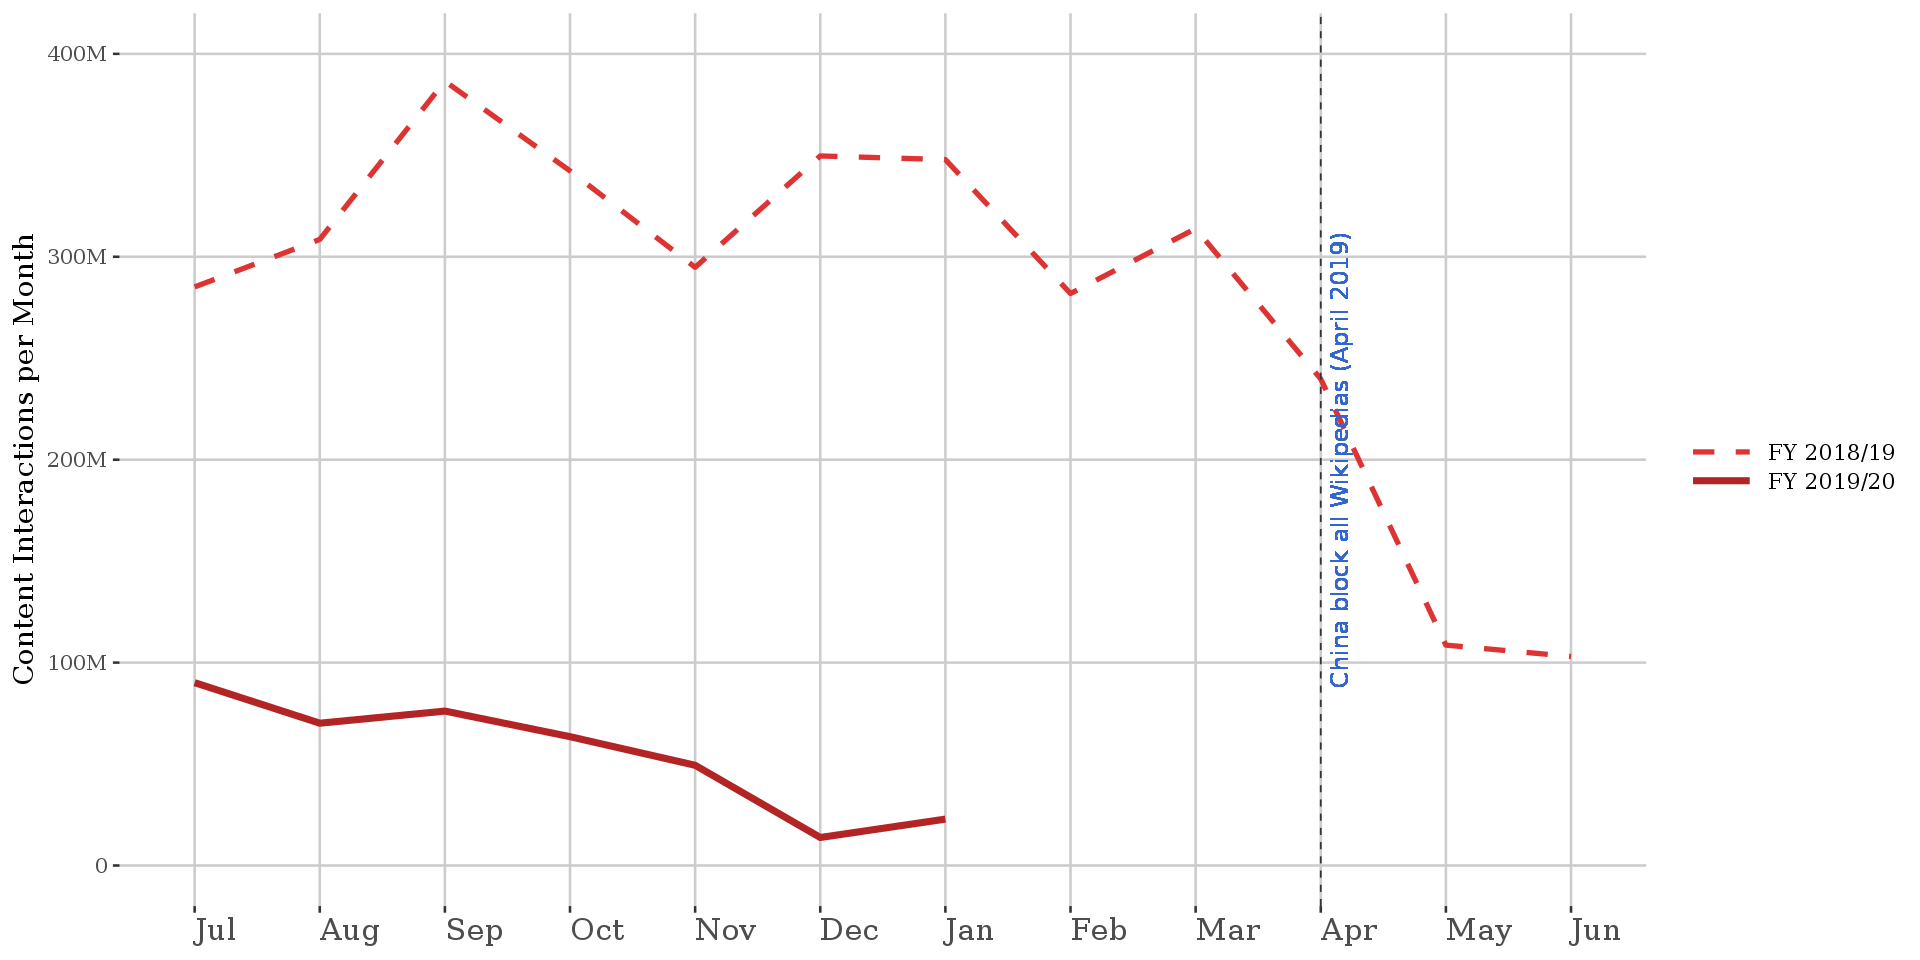

In [66]:
options(repr.plot.width = 16, repr.plot.height = 8)

p<- cn_fy %>%
    ggplot(aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = interactions, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year)) +   
    scale_linetype_manual(values=c("dashed","solid")) +
    scale_size_manual(values = c(1.5,2.0)) +
    scale_color_manual(values = c("FY 2018/19" = "#dd3333","FY 2019/20" = "#b32424")) +
    geom_vline(xintercept = 10, linetype = "dashed", color = "gray20") +
    geom_text(aes(x=10, y=20E7, label="China block all Wikipedias (April 2019)"), size=5, vjust = 1.5, angle = 90, color =  "#3366cc") +
    scale_x_discrete("Month",
                      breaks = cn_fy$MonthN, 
                     labels = cn_fy$Month) +
    scale_y_continuous("Content Interactions per Month",
                       labels = polloi::compress,
                       limits = c(0,4E8)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.title.x=element_blank(),
          axis.text.x =element_text( hjust = 0,size = 18),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=17,hjust = 0.5,vjust = -12),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 13),
          legend.key.width=unit(1.5,"cm"))
  

#ggsave(filename="Pageviews_monthly_yoy2.png", plot = p, path = 'Figures', units = "in", dpi = 192, height = 6, width = 14, limitsize = FALSE)  
p

### Interactions - Turkey

In [80]:
tr_pageviews$month = as.Date(substr(tr_pageviews$X__timestamp,0,10))
tr_previews$month = as.Date(substr(tr_previews$X__timestamp,0,10))

In [96]:
tr_data = merge(tr_pageviews, tr_previews, by.x = 'month',by.y = 'month',all.x = TRUE)

In [126]:
tr_fy <- tr_data %>% 
     select(month,sum__view_count.x,sum__view_count.y) %>%
     mutate(sum__view_count.y = replace_na(sum__view_count.y, 0)) %>%
     mutate(interactions = sum__view_count.x+sum__view_count.y) %>%
     mutate(fiscal_year = ifelse(month <'2018-07-01','FY 2016/17','FY 2019/20'),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))
#tr_fy$MonthN = factor(tr_fy$MonthN, levels=c("03", "04", "05", "06","07","08", "09", "10", "11", "12", "01", "02"))

t <- tr_fy %>% group_by(fiscal_year) %>% mutate(time=seq(1:n()))



In [127]:
head(t)

month,sum__view_count.x,sum__view_count.y,interactions,fiscal_year,MonthN,Month,time
<date>,<int>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<int>
2016-11-01,5413472,0,5413472,FY 2016/17,11,Nov,1
2016-11-02,5626583,0,5626583,FY 2016/17,11,Nov,2
2016-11-03,5445632,0,5445632,FY 2016/17,11,Nov,3
2016-11-04,5064814,0,5064814,FY 2016/17,11,Nov,4
2016-11-05,5538266,0,5538266,FY 2016/17,11,Nov,5
2016-11-06,6060549,0,6060549,FY 2016/17,11,Nov,6


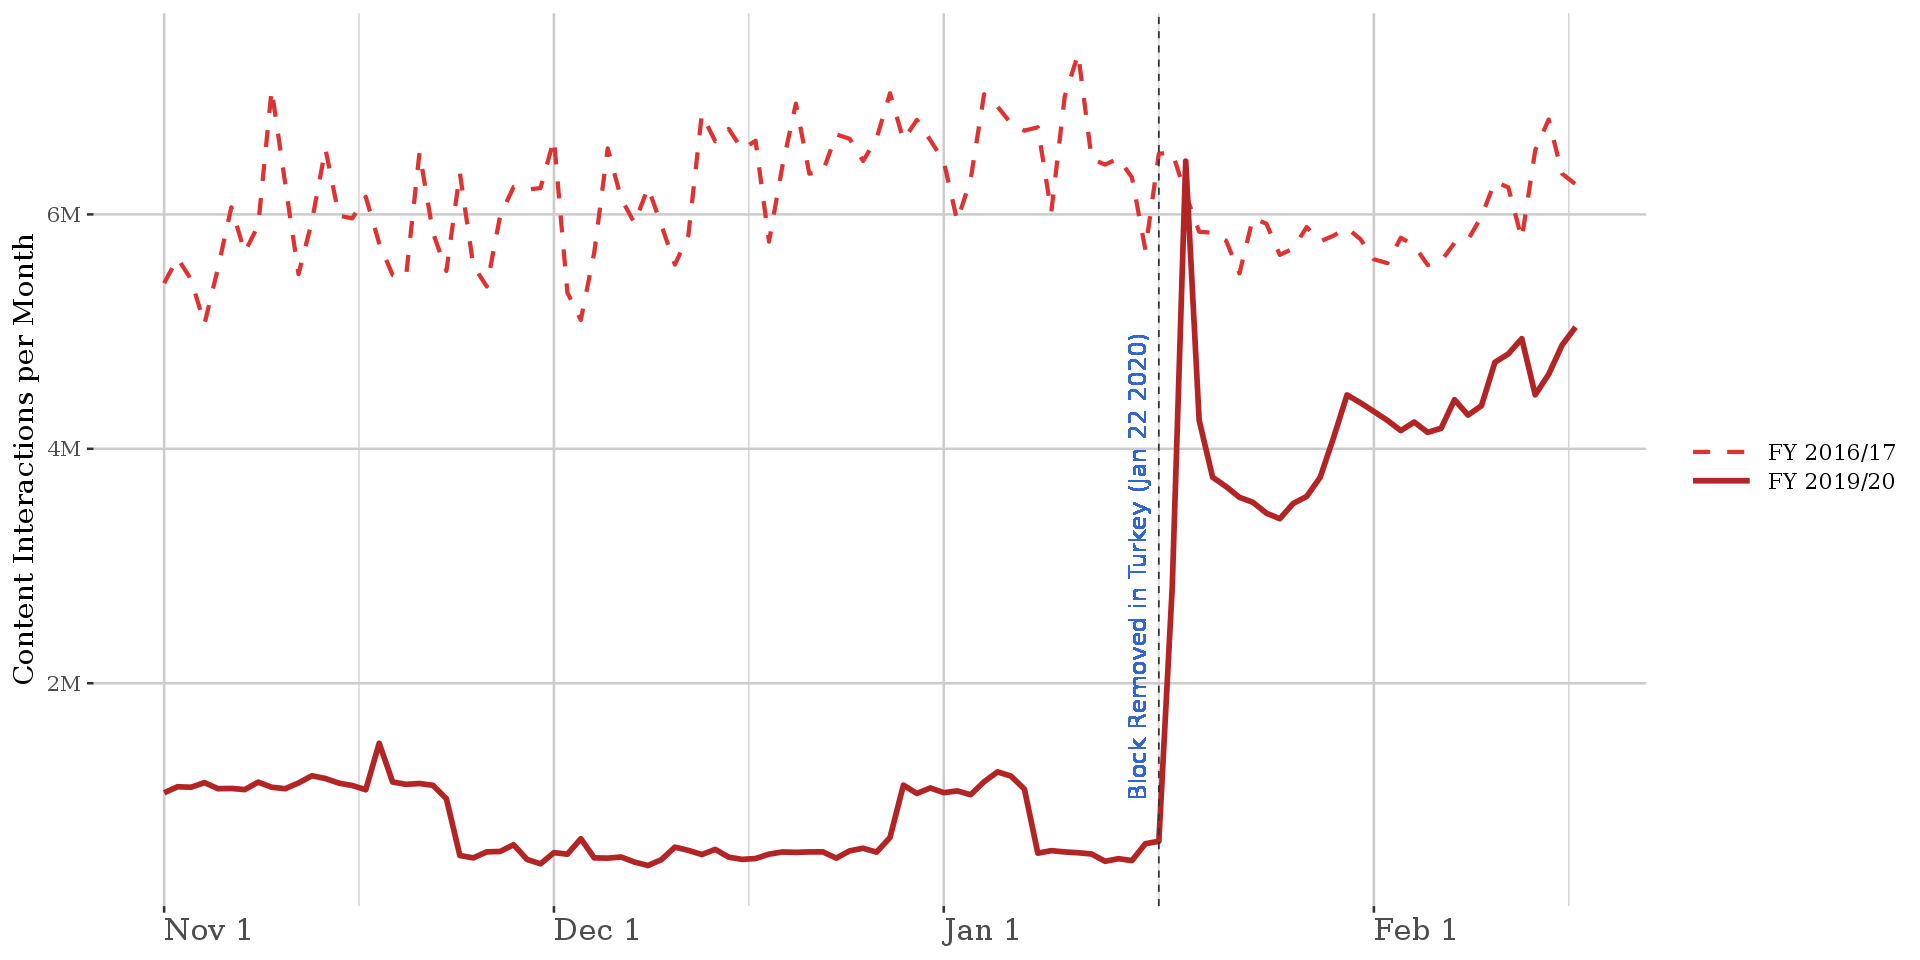

In [158]:
options(repr.plot.width = 16, repr.plot.height = 8)

p<- t %>%
    ggplot(.) +
    geom_path(aes(x = time, y = interactions, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year)) +
    scale_linetype_manual(values=c("dashed","solid")) +
    scale_size_manual(values = c(1.2,1.6)) +
    scale_color_manual(values = c("FY 2016/17" = "#dd3333","FY 2019/20" = "#b32424")) +
    geom_vline(xintercept = 75, linetype = "dashed", color = "gray20") +
    geom_text(aes(x=72, y=30E5, label="Block Removed in Turkey (Jan 22 2020)"), size=5, vjust = 1.5, angle = 90, color =  "#3366cc") +
    scale_y_continuous("Content Interactions per Month",
                       labels = polloi::compress) +
    scale_x_continuous(breaks = c(1,30,59,91),labels=c('Nov 1','Dec 1','Jan 1','Feb 1')) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.title.x=element_blank(),
          axis.text.x =element_text( hjust = 0,size = 18),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=17,hjust = 0.5,vjust = -12),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 13),
          legend.key.width=unit(1.5,"cm"))
  
p


## Unique Devices

In [9]:
#increasing in unique device from HongKong in September

update_pageviews_query <- "
INSERT INTO TABLE mneisler.pageviews_corrected
PARTITION (year, month, day)
SELECT 
  CONCAT(year,'-',LPAD(month,2,'0'),'-',LPAD(day,2,'0')) AS date,
  SUM(IF(access_method = 'mobile app', view_count, null)) AS apps,
  SUM(IF(access_method = 'desktop', view_count, null)) AS desktop,
  SUM(IF(access_method = 'mobile web', view_count, null)) AS mobileweb,
  SUM(view_count) as total,
  year, month, day
FROM wmf.pageview_hourly
  WHERE (year = '{metrics_year}'AND month = '{metrics_month}')
  AND agent_type='user'
  AND NOT (country_code IN ('PK', 'IR', 'AF') -- https://phabricator.wikimedia.org/T157404#3194046
  AND user_agent_map['browser_family'] = 'IE') -- https://phabricator.wikimedia.org/T193578#4300284
  GROUP BY year, month, day"
